## CBOW 모델 구현

In [38]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 334 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 335 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 336 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 337 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 338 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 339 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 340 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 341 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 342 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 343 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 344 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 345 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 346 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 347 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 348 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 358 |  반복 1

| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 671 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 672 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 673 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 674 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 675 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 676 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 677 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 678 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 679 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 680 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 681 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 682 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 683 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 684 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 685 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 686 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 687 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 688 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 689 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 690 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 691 |  반복 1

C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from curre

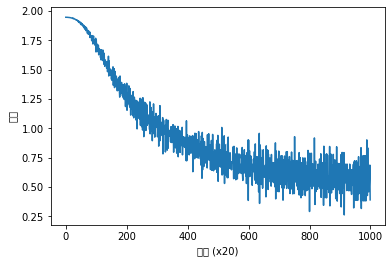

you [-1.0988301  1.1902585  1.2352625 -1.1584412  1.1439449]
say [ 1.2790757  -0.6699993  -0.35311782  1.2984554  -1.2731066 ]
goodbye [-0.8220853   0.7509159   0.78025615 -0.7193861   0.78811365]
and [ 0.9898742  -1.5492219  -1.6390909   0.9089231  -0.93302643]
i [-0.81970763  0.752943    0.7913284  -0.7448376   0.75067854]
hello [-1.0963925  1.1938792  1.2575108 -1.142724   1.1623682]
. [ 1.19158    1.5886432  1.6913493  1.2134043 -1.2150868]


In [39]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

import matplotlib.font_manager as fm

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

In [17]:
import sys
sys.path.append('..')  
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [18]:
print(target)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


In [19]:
print(contexts)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]
